In [1]:
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
x,y = make_blobs(n_samples=500,centers=3,cluster_std=0.4,random_state=0) # cluster_std make clusters very far

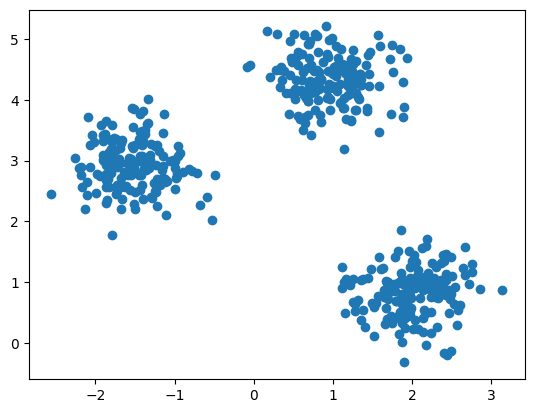

In [3]:
plt.scatter(x[:,0], x[:,1])

In [4]:
# Applying DBSCAN --
db = DBSCAN(eps=0.3,min_samples=10).fit(x) # eps = radius of the circle 

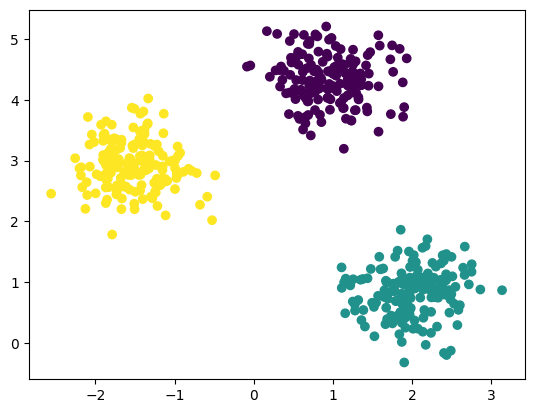

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

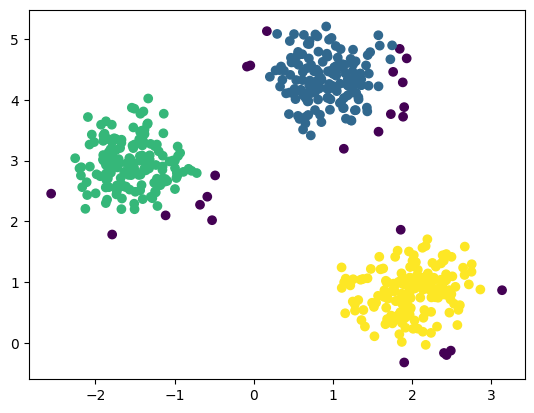

In [6]:
plt.scatter(x[:,0],x[:,1],c=db.labels_)

Now in the above graph we can see outliers in the purple color.

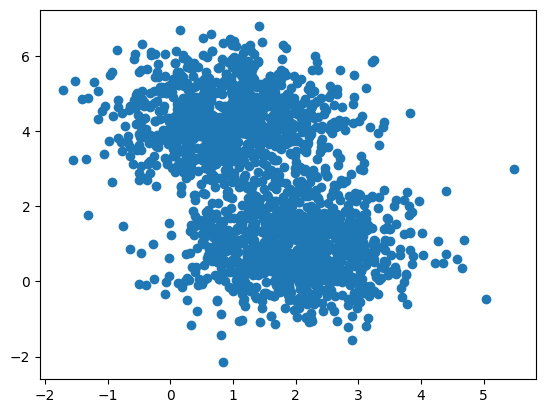

In [13]:
x,y = make_blobs(n_samples=2000, centers=2, cluster_std=0.9,random_state=0)
plt.scatter(x[:,0], x[:,1])

In [14]:
ee = EllipticEnvelope(contamination=0.1)
ee.fit(x)

EllipticEnvelope()

In [15]:
prediction = ee.predict(x)

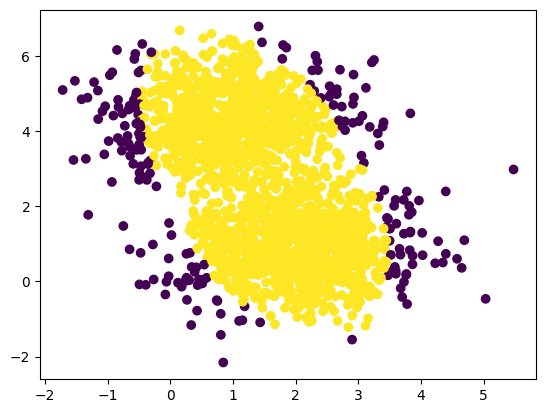

In [16]:
plt.scatter(x[:,0],x[:,1],c=prediction)

In [17]:
# Applying Isolation forest -
iso = IsolationForest()

In [18]:
iso.fit(x)

IsolationForest()

In [19]:
pred = iso.predict(x)

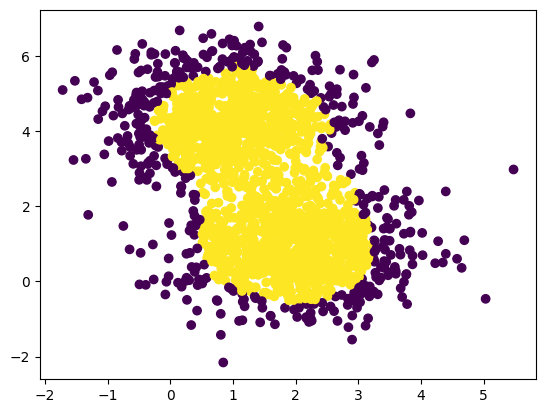

In [20]:
plt.scatter(x[:,0], x[:,1],c=pred)

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [22]:
clf = LocalOutlierFactor(n_neighbors=3)
clf.fit(x)

LocalOutlierFactor(n_neighbors=3)

In [23]:
pred = clf.fit_predict(x)

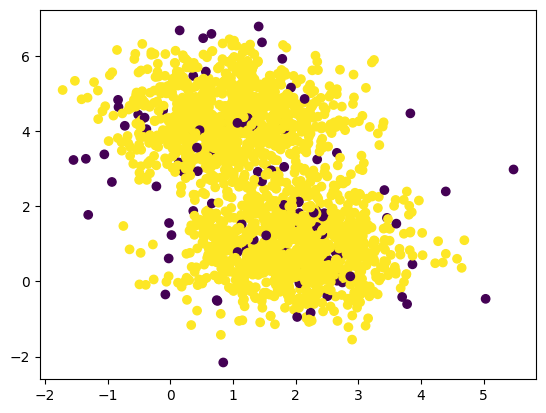

In [24]:
plt.scatter(x[:,0], x[:,1],c=pred)

In [25]:
x = np.array([[1,5],[1,6],[1,7],[2,5],[2,6],[6,5],[9,1]])

For proper study please refer to teacher notebook on outliers 

Number of outliers detected by DBSCAN on original features: 17
Number of outliers detected by DBSCAN on PCA features: 7


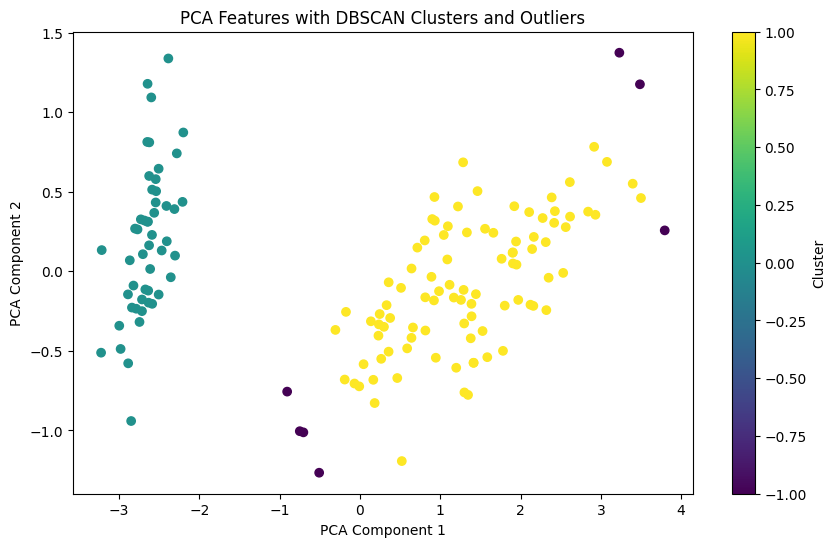

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Run DBSCAN on original features
dbscan_original = DBSCAN(eps=0.5, min_samples=5)
outliers_original = dbscan_original.fit_predict(X)

# Run DBSCAN on PCA features
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
outliers_pca = dbscan_pca.fit_predict(X_pca)

# Count number of outliers/noisy points detected by DBSCAN
n_outliers_original = np.sum(outliers_original == -1)  # -1 represents outliers
n_outliers_pca = np.sum(outliers_pca == -1)

print(f"Number of outliers detected by DBSCAN on original features: {n_outliers_original}")
print(f"Number of outliers detected by DBSCAN on PCA features: {n_outliers_pca}")

# Plot PCA features with cluster predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers_pca, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Features with DBSCAN Clusters and Outliers')
plt.colorbar(label='Cluster')
plt.show()
